In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!apt-get install unrar
!pip install rarfile

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
# Path to the .rar file
rar_file_path = "/content/drive/MyDrive/Localized.rar"

# Destination folder for extracted files
extract_to = "/content/myData"

# Ensure the destination directory exists
os.makedirs(extract_to, exist_ok=True)

# Extract using unrar
!unrar x -r {rar_file_path} {extract_to}


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Localized.rar

Creating    /content/myData/Localized                                 OK
Creating    /content/myData/Localized/Localized_Test                  OK
Creating    /content/myData/Localized/Localized_Test/Localized_Images  OK
Extracting  /content/myData/Localized/Localized_Test/Localized_Images/EMIDEC_Case_N024_slice_1_NoInf_NoReflowN.npy       0%  OK 
Extracting  /content/myData/Localized/Localized_Test/Localized_Images/EMIDEC_Case_N024_slice_2_NoInf_NoReflowN.npy       0%  OK 
Extracting  /content/myData/Localized/Localized_Test/Localized_Images/EMIDEC_Case_N024_slice_3_NoInf_NoReflowN.npy       0%  OK 
Extracting  /content/myData/Localized/Localized_Test/Localized_Images/EMIDEC_Case_N024_slice_4_NoInf_NoReflowN.npy       0%  OK 
Extracting  /content/myData/Localized/Localized_Test/Localized_Images/EMIDEC_Case_N024_slice_5_NoI

In [ ]:
# Path to the images directory
train_images_path = "/content/myData/Localized/Localized_Train/Localized_Images"

# List all files in the images directory
train_image_files = sorted(os.listdir(train_images_path))

# Open the first .npy image
first_image_path = os.path.join(train_images_path, train_image_files[0])
image_array = np.load(first_image_path)  # Load the NumPy array

# Print shape and number of channels
print("Image shape:", image_array.shape)  # (height, width, channels) or (height, width)
if image_array.ndim == 2:
    print("Number of channels: 1 (grayscale)")
else:
    print("Number of channels:", image_array.shape[-1])  # Last dimension represents channels

Image shape: (128, 128)
Number of channels: 1 (grayscale)


In [ ]:
  # Paths to the images and masks directories
train_images_path = "/content/myData/Localized/Localized_Train/Localized_Images"
train_masks_path = "/content/myData/Localized/Localized_Train/Localized_Masks"
test_images_path = "/content/myData/Localized/Localized_Test/Localized_Images"
test_masks_path = "/content/myData/Localized/Localized_Test/Localized_Masks"

# List and sort files to ensure they match
train_image_files = sorted(os.listdir(train_images_path))
train_mask_files = sorted(os.listdir(train_masks_path))
test_image_files = sorted(os.listdir(test_images_path))
test_mask_files = sorted(os.listdir(test_masks_path))

In [ ]:
def load_dataset(images_path, masks_path):
    images = []
    masks = []
    filenames = []

    # List all files in sorted order to ensure proper alignment
    image_files = sorted(os.listdir(images_path))
    mask_files = sorted(os.listdir(masks_path))

    for img_file, mask_file in zip(image_files, mask_files):
        # Full paths
        img_path = os.path.join(images_path, img_file)
        mask_path = os.path.join(masks_path, mask_file)

        # Load images and masks as NumPy arrays
        img = np.load(img_path)  # Shape: (H, W) or (H, W, C)
        mask = np.load(mask_path)  # Shape: (H, W) or (H, W, C)

        # Append to lists
        images.append(img)
        masks.append(mask)
        filenames.append(img_file)


    # Convert lists to tensors
    images = tf.convert_to_tensor(images, dtype=tf.float32)  # Shape: (N, H, W, 1)
    masks = tf.convert_to_tensor(masks, dtype=tf.float32)  # Shape: (N, H, W, 1)

    return images, masks, filenames


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
# Load dataset
train_images_tensor, train_masks_tensor, train_filenames = load_dataset(train_images_path, train_masks_path)
test_images_tensor, test_masks_tensor, test_filenames = load_dataset(test_images_path, test_masks_path)
train_images_tensor = tf.expand_dims(train_images_tensor, axis=-1)
train_masks_tensor = tf.expand_dims(train_masks_tensor, axis=-1)
test_images_tensor = tf.expand_dims(test_images_tensor, axis=-1)
test_masks_tensor = tf.expand_dims(test_masks_tensor, axis=-1)



# Check shapes
print(f"Train Images Tensor Shape: {train_images_tensor.shape}, dtype: {train_images_tensor.dtype}")
print(f"Train Masks Tensor Shape: {train_masks_tensor.shape}, dtype: {train_masks_tensor.dtype}")
print(f"Test Images Tensor Shape: {test_images_tensor.shape}, dtype: {test_images_tensor.dtype}")
print(f"Test Masks Tensor Shape: {test_masks_tensor.shape}, dtype: {test_masks_tensor.dtype}")

Train Images Tensor Shape: (685, 128, 128, 1), dtype: <dtype: 'float32'>
Train Masks Tensor Shape: (685, 128, 128, 1), dtype: <dtype: 'float32'>
Test Images Tensor Shape: (125, 128, 128, 1), dtype: <dtype: 'float32'>
Test Masks Tensor Shape: (125, 128, 128, 1), dtype: <dtype: 'float32'>


In [ ]:
# def resize(input_image, real_image, height, width):
#   input_image = tf.image.resize(input_image, [height, width],
#                                 method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
#   real_image = tf.image.resize(real_image, [height, width],
#                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

#   return input_image, real_image

In [ ]:
# train_masks_tensor, train_images_tensor = resize(train_masks_tensor,train_images_tensor,256,256)
# test_masks_tensor, test_images_tensor = resize(test_masks_tensor, test_images_tensor,256,256)


In [ ]:
# def normalize_0_255(tensor):
#     min_val = tf.reduce_min(tensor)
#     max_val = tf.reduce_max(tensor)
#     return tf.cast((tensor - min_val) / (max_val - min_val) * 255, tf.float32)

In [ ]:
# train_images_tensor = normalize_0_255(train_images_tensor)
# test_images_tensor = normalize_0_255(test_images_tensor)

In [ ]:
# Check counts after augmentation
inf_count = sum(1 for f in train_filenames if '_Inf_' in f)
noinf_count = sum(1 for f in train_filenames if '_NoInf_' in f)
print(f"Inf/NoInf Balance: {inf_count} vs {noinf_count}")

reflowy_count = sum(1 for f in train_filenames if 'NoReflowY' in f)
reflown_count = sum(1 for f in train_filenames if 'NoReflowN' in f)
print(f"NoReflowY/NoReflowN Balance: {reflowy_count} vs {reflown_count}")

Inf/NoInf Balance: 392 vs 293
NoReflowY/NoReflowN Balance: 99 vs 586


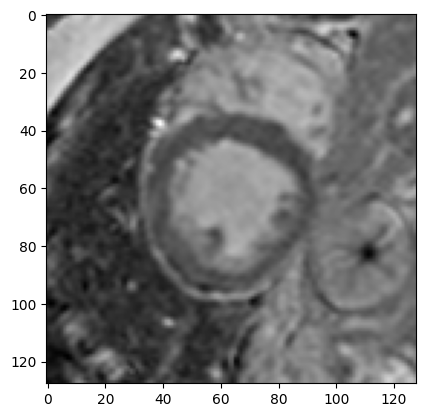

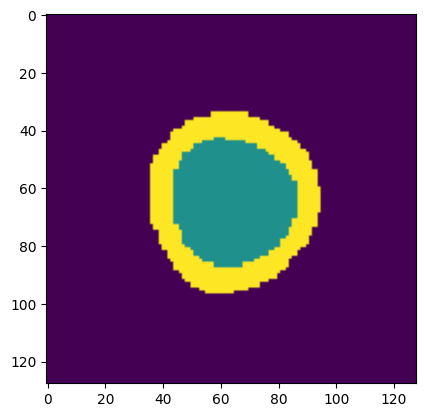

In [ ]:
re = train_images_tensor[55]
inp = train_masks_tensor[55]
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(re/255.0, cmap='gray')
plt.figure()
plt.imshow(inp)

In [ ]:
print(f"Image value range: min={np.min(re/255.0)}, max={np.max(re/255.0)}")

Image value range: min=7.419607639312744, max=11.094118118286133


In [ ]:
# Check shapes
print(f"Train Images Tensor Shape: {train_images_tensor.shape}, dtype: {train_images_tensor.dtype}")
print(f"Train Masks Tensor Shape: {train_masks_tensor.shape}, dtype: {train_masks_tensor.dtype}")
print(f"Test Images Tensor Shape: {test_images_tensor.shape}, dtype: {test_images_tensor.dtype}")
print(f"Test Masks Tensor Shape: {test_masks_tensor.shape}, dtype: {test_masks_tensor.dtype}")

Train Images Tensor Shape: (685, 128, 128, 1), dtype: <dtype: 'float32'>
Train Masks Tensor Shape: (685, 128, 128, 1), dtype: <dtype: 'float32'>
Test Images Tensor Shape: (125, 128, 128, 1), dtype: <dtype: 'float32'>
Test Masks Tensor Shape: (125, 128, 128, 1), dtype: <dtype: 'float32'>


In [ ]:
def augment_image_mask(image, mask):
    # Random rotation (0, 90, 180, 270 degrees)
    k = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    image = tf.image.rot90(image, k)
    mask = tf.image.rot90(mask, k)

    # Random scaling between 0.8 and 1.2
    scale = tf.random.uniform(shape=[], minval=0.8, maxval=1.2)
    new_size = tf.cast(tf.cast(tf.shape(image)[0:2], tf.float32) * scale, tf.int32)
    image = tf.image.resize(image, new_size, method='bilinear')
    mask = tf.image.resize(mask, new_size, method='nearest')

    # Random crop or pad to original size
    target_size = tf.shape(image)[0:2]  # Assuming square images; adjust if needed
    image = tf.image.resize_with_crop_or_pad(image, 128, 128)
    mask = tf.image.resize_with_crop_or_pad(mask, 128, 128)

    # Random flips
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_up_down(image)
        mask = tf.image.flip_up_down(mask)

    return image, mask

In [ ]:
def balance_classes(images, masks, filenames, class_markers):
    """
    Balances classes by augmenting minority class.
    class_markers: Tuple of (target_class, minority_marker, majority_marker)
                  e.g., ('Inf', '_Inf_', '_NoInf_') or ('NoReflow', 'NoReflowY', 'NoReflowN')
    """
    target_class, minority_marker, majority_marker = class_markers

    # Identify minority and majority samples
    minority_indices = [i for i, f in enumerate(filenames) if minority_marker in f]
    majority_indices = [i for i, f in enumerate(filenames) if majority_marker in f]

    # Calculate required augmentations
    minority_count = len(minority_indices)
    majority_count = len(majority_indices)
    required = majority_count - minority_count

    if required <= 0:
        return images, masks, filenames  # No augmentation needed

    # Generate augmented samples
    augmented_images, augmented_masks, augmented_filenames = [], [], []
    aug_per_sample = required // minority_count
    remainder = required % minority_count

    for i, idx in enumerate(minority_indices):
        num_aug = aug_per_sample + 1 if i < remainder else aug_per_sample
        for _ in range(num_aug):
            aug_img, aug_mask = augment_image_mask(images[idx], masks[idx])
            augmented_images.append(aug_img)
            augmented_masks.append(aug_mask)
            augmented_filenames.append(filenames[idx])  # Track source filename

    # Combine with original data
    combined_images = tf.concat([images, tf.stack(augmented_images)], axis=0)
    combined_masks = tf.concat([masks, tf.stack(augmented_masks)], axis=0)
    combined_filenames = filenames + augmented_filenames

    return combined_images, combined_masks, combined_filenames

In [ ]:
# Check shapes
print(f"Train Images Tensor Shape: {train_images_tensor.shape}, dtype: {train_images_tensor.dtype}")
print(f"Train Masks Tensor Shape: {train_masks_tensor.shape}, dtype: {train_masks_tensor.dtype}")
print(f"Test Images Tensor Shape: {test_images_tensor.shape}, dtype: {test_images_tensor.dtype}")
print(f"Test Masks Tensor Shape: {test_masks_tensor.shape}, dtype: {test_masks_tensor.dtype}")

Train Images Tensor Shape: (685, 128, 128, 1), dtype: <dtype: 'float32'>
Train Masks Tensor Shape: (685, 128, 128, 1), dtype: <dtype: 'float32'>
Test Images Tensor Shape: (125, 128, 128, 1), dtype: <dtype: 'float32'>
Test Masks Tensor Shape: (125, 128, 128, 1), dtype: <dtype: 'float32'>


In [ ]:
# Balance Inf/NoInf
train_images_bal1, train_masks_bal1, train_fnames_bal1 = balance_classes(
    train_images_tensor, train_masks_tensor, train_filenames,
    ('Inf', '_Inf_', '_NoInf_') if (len([f for f in train_filenames if '_Inf_' in f]) < len([f for f in train_filenames if '_NoInf_' in f])) else ('Inf', '_NoInf_', '_Inf_')
)

# Balance NoReflowY/NoReflowN on the updated dataset
train_images_balanced, train_masks_balanced, train_fnames_balanced = balance_classes(
    train_images_bal1, train_masks_bal1, train_fnames_bal1,
    ('NoReflow', 'NoReflowY', 'NoReflowN') if (len([f for f in train_fnames_bal1 if 'NoReflowY' in f]) < len([f for f in train_fnames_bal1 if 'NoReflowN' in f])) else ('NoReflow', 'NoReflowN', 'NoReflowY')
)

print("Balanced Training Data Shape:", train_images_balanced.shape)

Balanced Training Data Shape: (1370, 128, 128, 1)


In [ ]:
# Check counts after augmentation
inf_count = sum(1 for f in train_fnames_balanced if '_Inf_' in f)
noinf_count = sum(1 for f in train_fnames_balanced if '_NoInf_' in f)
print(f"Inf/NoInf Balance: {inf_count} vs {noinf_count}")

reflowy_count = sum(1 for f in train_fnames_balanced if 'NoReflowY' in f)
reflown_count = sum(1 for f in train_fnames_balanced if 'NoReflowN' in f)
print(f"NoReflowY/NoReflowN Balance: {reflowy_count} vs {reflown_count}")

Inf/NoInf Balance: 978 vs 392
NoReflowY/NoReflowN Balance: 685 vs 685


In [ ]:
def augment_to_target_size(images, masks, filenames, target_size, augment_func):
    """
    Augments dataset randomly to reach target_size samples.
    Returns augmented_images, augmented_masks, augmented_filenames
    """
    current_size = images.shape[0]
    if current_size >= target_size:
        print(f"Dataset already has {current_size} samples (>= {target_size})")
        return images, masks, filenames

    # Calculate how many new samples we need to generate
    num_to_generate = target_size - current_size

    # Randomly select samples to augment (with replacement)
    indices = tf.random.uniform(
        shape=[num_to_generate],
        minval=0,
        maxval=current_size,
        dtype=tf.int32
    )

    # Generate augmented samples
    augmented_images, augmented_masks, augmented_filenames = [], [], []
    for idx in indices:
        img = images[idx]
        msk = masks[idx]
        aug_img, aug_mask = augment_func(img, msk)

        augmented_images.append(aug_img)
        augmented_masks.append(aug_mask)
        augmented_filenames.append(f"aug_{filenames[idx.numpy()]}")  # Track source

    # Combine with original data
    final_images = tf.concat([images, tf.stack(augmented_images)], axis=0)
    final_masks = tf.concat([masks, tf.stack(augmented_masks)], axis=0)
    final_filenames = filenames + augmented_filenames

    # Shuffle the combined dataset
    perm = tf.random.shuffle(tf.range(final_images.shape[0]))
    final_images = tf.gather(final_images, perm)
    final_masks = tf.gather(final_masks, perm)
    final_filenames = [final_filenames[i] for i in perm.numpy()]

    return final_images, final_masks, final_filenames

In [ ]:
# Define your target dataset size (e.g., 2x original balanced size)
target_size = 2000

# Apply augmentation
augmented_images, augmented_masks, augmented_filenames = augment_to_target_size(
    train_images_balanced,
    train_masks_balanced,
    train_fnames_balanced,
    target_size=target_size,
    augment_func=augment_image_mask
)

print(f"Final dataset size: {augmented_images.shape[0]}")

Final dataset size: 2000


In [ ]:
print(f"Train dataset size: {(augmented_images.shape)}")

Train dataset size: (2000, 128, 128, 1)


In [ ]:
# Assuming 'image' is a NumPy array
print(f"Image value range: min={np.min(re/255.0)}, max={np.max(re/255.0)}")

Image value range: min=7.419607639312744, max=11.094118118286133


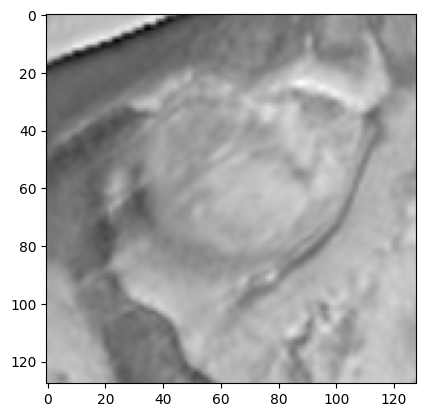

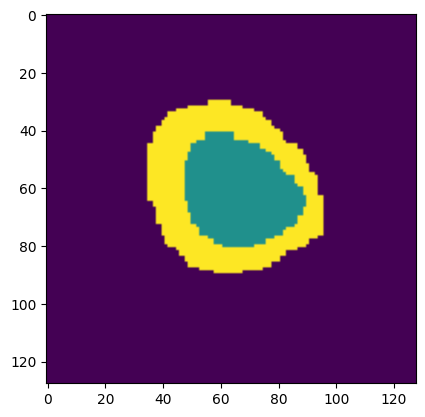

In [ ]:
re = augmented_images[55]
inp = augmented_masks[55]
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(re, cmap='gray')
plt.figure()
plt.imshow(inp)

In [ ]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [ ]:
augmented_masks, augmented_images = resize(augmented_masks,augmented_images,256,256)
test_masks_tensor, test_images_tensor = resize(test_masks_tensor, test_images_tensor,256,256)


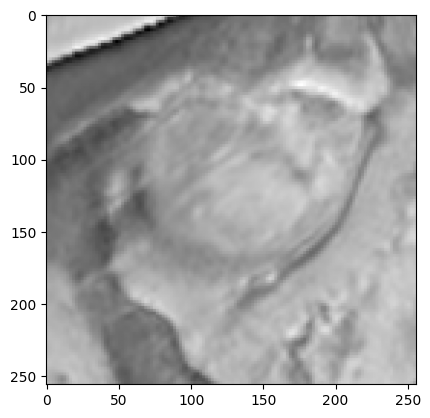

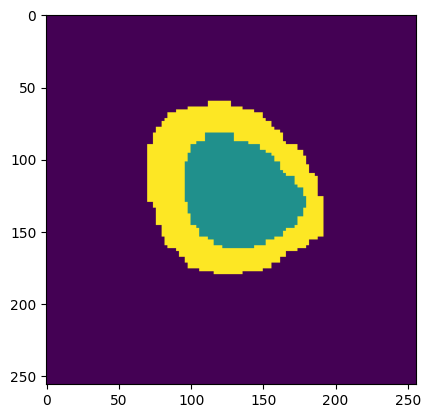

In [ ]:
re = augmented_images[55]
inp = augmented_masks[55]
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(re, cmap='gray')
plt.figure()
plt.imshow(inp)

In [ ]:
def normalize_0_255(tensor):
    min_val = tf.reduce_min(tensor)
    max_val = tf.reduce_max(tensor)
    return tf.cast((tensor - min_val) / (max_val - min_val) * 255, tf.float32)

In [ ]:
augmented_images = normalize_0_255(augmented_images)
test_images_tensor = normalize_0_255(test_images_tensor)

In [ ]:
# Assuming 'image' is a NumPy array
print(f"Image value range: min={np.min(augmented_images[55]/255.0)}, max={np.max(augmented_images[55]/255.0)}")

Image value range: min=0.2989479899406433, max=0.7717226147651672


In [ ]:
# Verify Inf/NoInf balance
inf_count = sum(1 for f in augmented_filenames if "_Inf_" in f)
noinf_count = sum(1 for f in augmented_filenames if "_NoInf_" in f)
print(f"Infected: {inf_count}, Non-Infected: {noinf_count}")

# Verify NoReflow balance
reflowy_count = sum(1 for f in augmented_filenames if "NoReflowY" in f)
reflown_count = sum(1 for f in augmented_filenames if "NoReflowN" in f)
print(f"NoReflow-Y: {reflowy_count}, NoReflow-N: {reflown_count}")

Infected: 1399, Non-Infected: 601
NoReflow-Y: 969, NoReflow-N: 1031


In [ ]:
# The facade training set consist of 400 images
BUFFER_SIZE = len(augmented_images)
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [ ]:
# Normalizing the images to [-1, 1]
def normalize(real_image):
  real_image = (real_image / 127.5) - 1

  return real_image

In [ ]:
augmented_images = normalize(augmented_images)
test_images_tensor = normalize(test_images_tensor)

In [ ]:
print(f"Image value range: min={np.min(augmented_images[30])}, max={np.max(augmented_images[30])}")

Image value range: min=-1.0, max=0.4768657684326172


In [ ]:
# Create tf.data.Dataset objects for training and testing
train_dataset = tf.data.Dataset.from_tensor_slices((augmented_masks, augmented_images))
test_dataset = tf.data.Dataset.from_tensor_slices((test_masks_tensor, test_images_tensor))

# Optional: Batch the datasets
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(buffer_size=100).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Print dataset sizes
print(f"Train dataset size: {len(augmented_images)}")
print(f"Test dataset size: {len(test_images_tensor)}")

Train dataset size: 2000
Test dataset size: 125


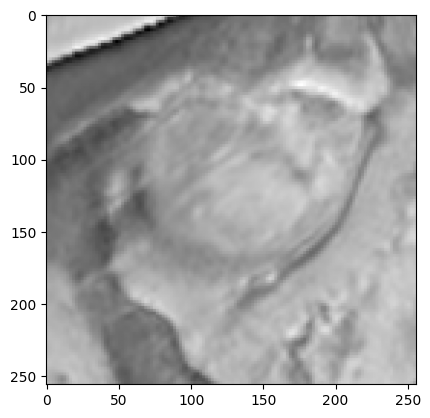

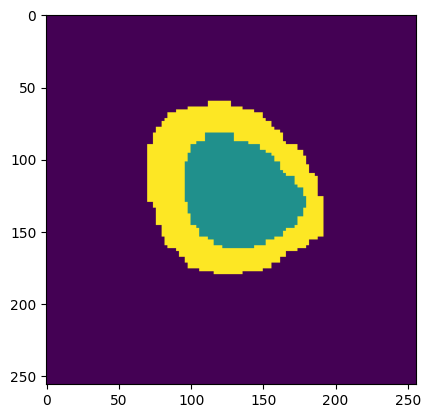

In [ ]:
re = augmented_images[55]
inp = augmented_masks[55]
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(re, cmap='gray')
plt.figure()
plt.imshow(inp)

In [ ]:
print(augmented_images.shape)
print(augmented_masks.shape)
print(test_images_tensor.shape)
print(test_masks_tensor.shape)

(2000, 256, 256, 1)
(2000, 256, 256, 1)
(125, 256, 256, 1)
(125, 256, 256, 1)


In [ ]:
OUTPUT_CHANNELS = 1

In [ ]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [ ]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(re, 0))
print (down_result.shape)

(1, 128, 128, 3)


In [ ]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [ ]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 256, 256, 3)


In [ ]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 1])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 1)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
generator = Generator()
generator.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 128, 128, 64)   │          1,024 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, 64, 64, 128)    │        131,584 │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_4 (Sequential) │ (None, 32, 32, 256)    │        525,312 │ sequential_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_5 (Sequential) │ (None, 16, 16, 512)    │      2,099,200 │ sequential_4[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_6 (Sequential) │ (None, 8, 8, 512)      │      4,196,352 │ sequential_5[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_7 (Sequential) │ (None, 4, 4, 512)      │      4,196,352 │ sequential_6[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 2, 2, 512)      │      4,196,352 │ sequential_7[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 1, 1, 512)      │      4,196,352 │ sequential_8[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 2, 2, 512)      │      4,196,352 │ sequential_9[0][0]     │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 2, 2, 1024)     │              0 │ sequential_10[0][0],   │
│                           │                        │                │ sequential_8[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_11             │ (None, 4, 4, 512)      │      8,390,656 │ concatenate[0][0]      │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 4, 4, 1024)     │              0 │ sequential_11[0][0],   │
│ (Concatenate)             │                        │                │ sequential_7[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_12             │ (None, 8, 8, 512)      │      8,390,656 │ concatenate_1[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 8, 8, 1024)     │              0 │ sequential_12[0][0],   │
│ (Concatenate)             │                        │                │ sequential_6[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_13             │ (None, 16, 16, 512)    │      8,390,656 │ concatenate_2[0][0]    │
│ (Sequential)         

 Total params: 54,419,713 (207.59 MB)

 Trainable params: 54,408,833 (207.55 MB)

 Non-trainable params: 10,880 (42.50 KB)

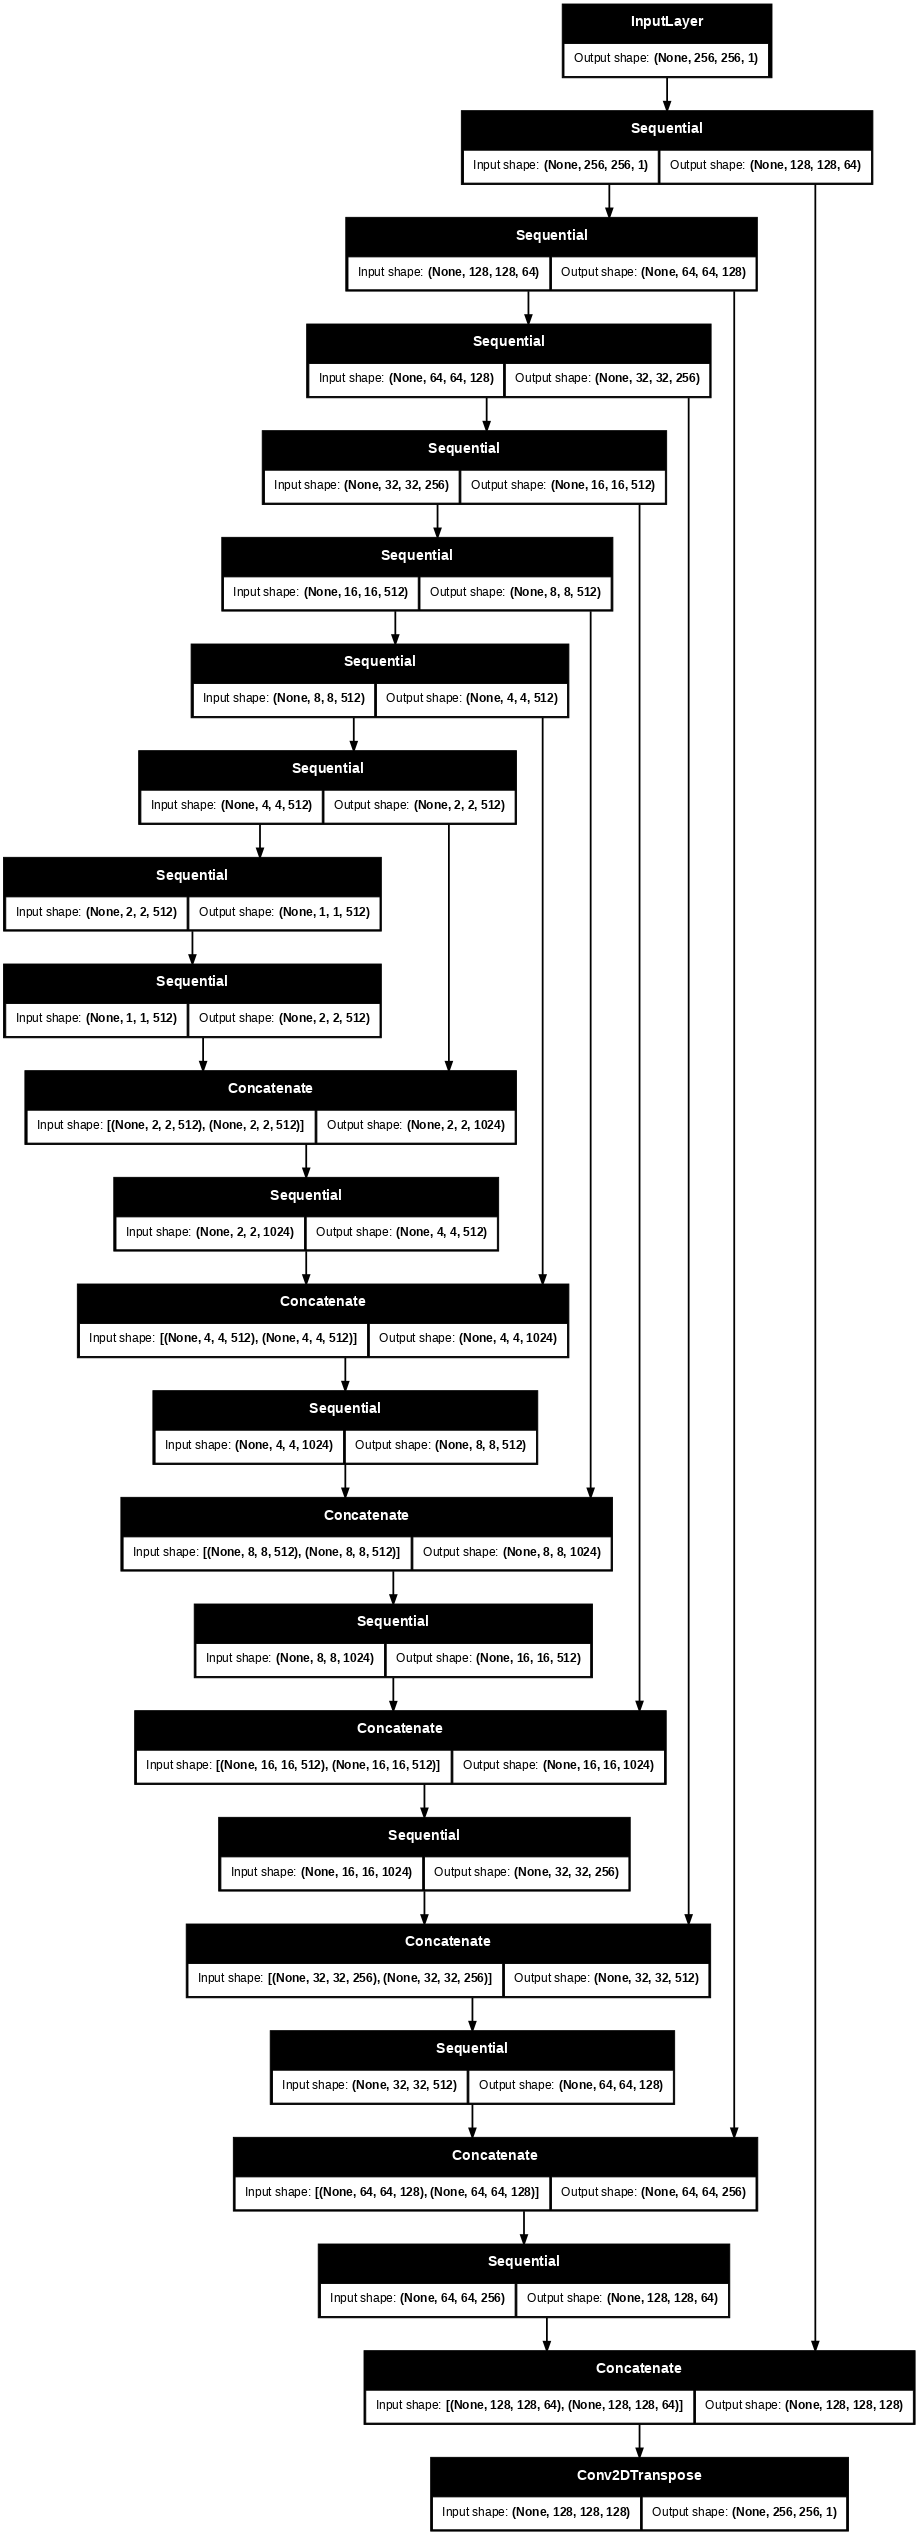

In [ ]:
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

(1, 256, 256, 1)


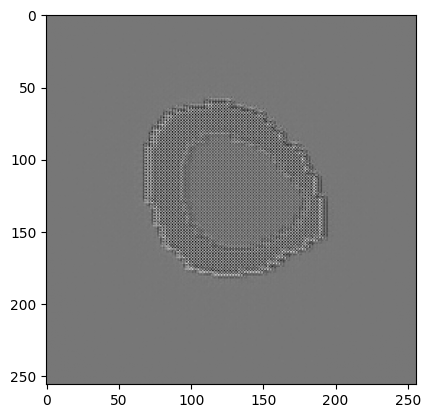

In [ ]:
gen_output = generator(inp[tf.newaxis, ...], training=False)
print(gen_output.shape)
plt.imshow(gen_output[0, ...],cmap="gray")

In [ ]:
LAMBDA = 100

In [ ]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(disc_generated_output, gen_output, target, input_mask):
    # Original GAN loss component
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # Create weight matrix for different regions
    weights = tf.where(input_mask == 3, 6.0, 1.0)  # Infarction (6x)
    weights = tf.where(input_mask == 4, 6.0, weights)  # No-reflow (6x)
    weights = tf.where(input_mask == 2, 4.0, weights)  # Normal myocardium (3x)
    weights = tf.where(input_mask == 1, 2.0, weights)  # Cavity (2x)

    # Expand weights to match image dimensions [batch, H, W, 1]
    weights = tf.expand_dims(weights, axis=-1)

    # Weighted L1 loss calculation
    l1_loss = tf.reduce_mean(weights * tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (LAMBDA * l1_loss)
    return total_gen_loss, gan_loss, l1_loss


In [ ]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 1], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 1], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

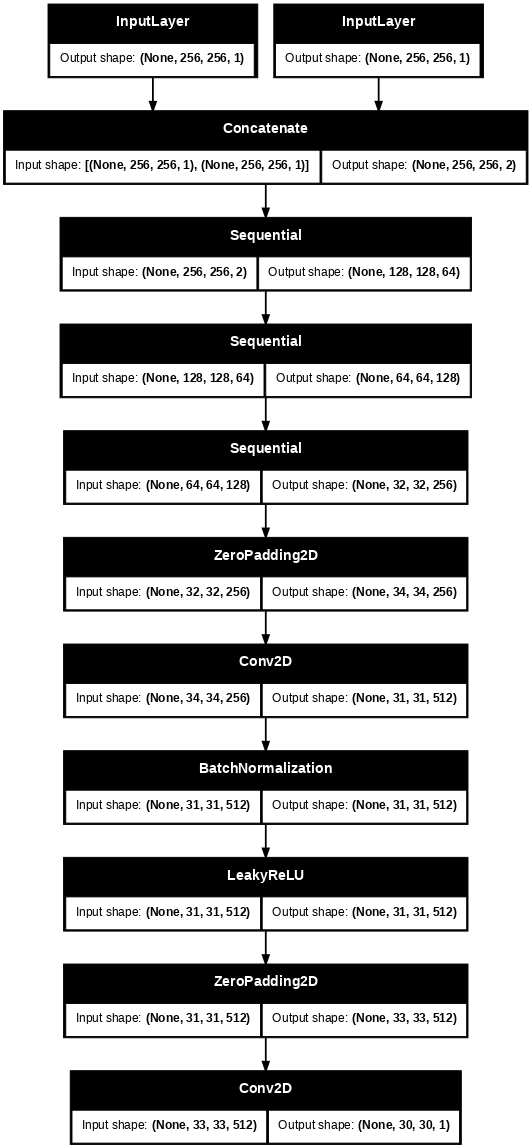

In [ ]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

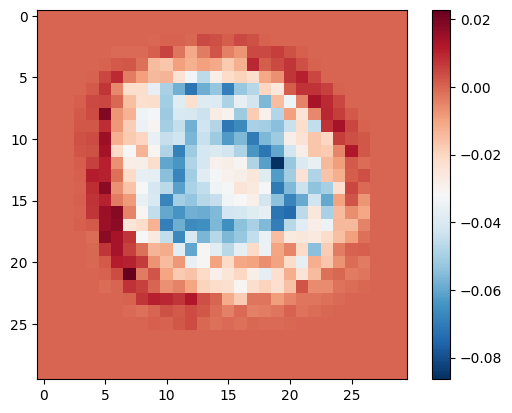

In [ ]:
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], cmap='RdBu_r')
plt.colorbar()

In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output, mask):
    # Calculate the real and generated losses
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    # Apply weight to the real loss and generated loss based on the mask
    # Apply higher weight to areas that are infarction (3) and no-reflow (4)
    weights = tf.where(mask == 0, 1.0,  # Weight for pixels with value 0
            tf.where(mask == 1, 2.0,  # Weight for pixels with value 1
            tf.where(mask == 2, 3.0,  # Weight for pixels with value 2
            tf.where((mask == 3) | (mask == 4), 4.0, 1.0))))  # Weight for pixels with value 3 or 4


    # Weighted loss for both real and generated
    weighted_real_loss = tf.reduce_mean(real_loss * weights)
    weighted_generated_loss = tf.reduce_mean(generated_loss * weights)

    # Total discriminator loss with weighted real and generated losses
    total_disc_loss = weighted_real_loss + weighted_generated_loss

    return total_disc_loss


In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [ ]:
# Define checkpoint directory inside Google Drive
checkpoint_dir = '/content/drive/MyDrive/final_ckpt'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

# Define the checkpoint
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
def generate_images(model, test_input, tar):
    test_input = tf.squeeze(test_input, axis=0)  # Remove batch dim
    tar = tf.squeeze(tar, axis=0)  # Remove batch dim
    prediction = model(tf.expand_dims(test_input, axis=0), training=True)
    prediction = tf.squeeze(prediction, axis=0)  # Remove batch dim after prediction

    plt.figure(figsize=(15, 15))
    display_list = [test_input, tar, prediction]
    titles = ['Input Mask', 'Ground Truth (Grayscale)', 'Predicted Image (Grayscale)']

    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.title(titles[i])
        if(i==1 or i==2):
          plt.imshow(display_list[i], cmap='gray')  # Ensure grayscale rendering
        else:
          plt.imshow(display_list[i])  # Ensure grayscale rendering
        plt.axis('off')

    plt.show()


In [ ]:
print(augmented_images[5].shape)

(256, 256, 1)


In [ ]:
print(augmented_masks[5].shape)
print(np.unique(augmented_masks[5]))

(256, 256, 1)
[0. 1. 2. 3. 4.]


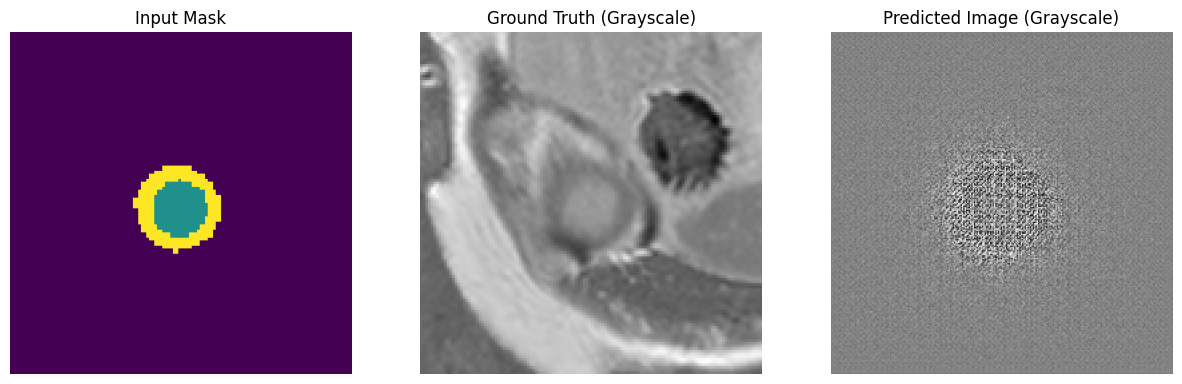

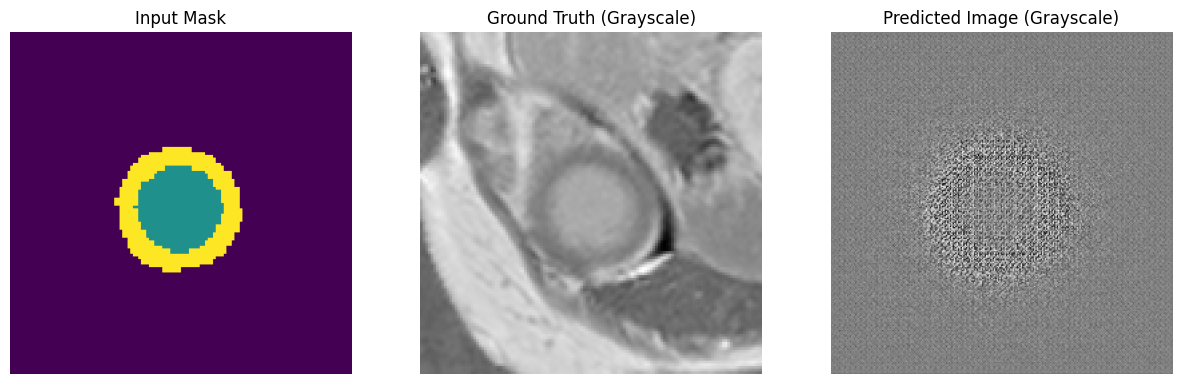

In [ ]:
for example_input, example_target in test_dataset.take(2):
  generate_images(generator, example_input, example_target)

In [ ]:
log_dir="/content/drive/MyDrive/final_logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [ ]:
@tf.function
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target, input_image)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output, input_image)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

In [ ]:
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 1000 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step//1000}k")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 5000 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

Time taken for 1000 steps: 112.54 sec



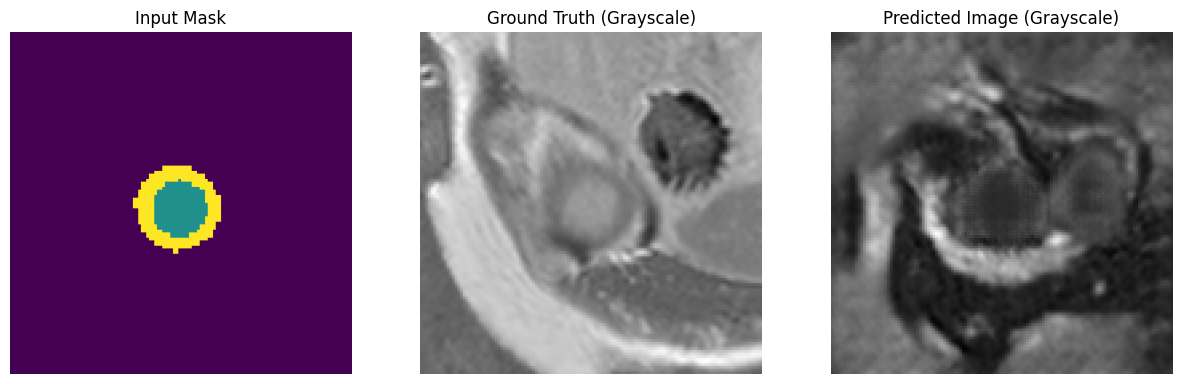

Step: 59k
....................................................................................................

In [ ]:
fit(train_dataset, test_dataset, steps=60000)

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Define a save path in Google Drive
save_dir = '/content/drive/MyDrive/final_model/'


In [ ]:
# Save the entire model to the specified directory
model_save_path = os.path.join(save_dir, 'weightd_trained_model.h5')
generator.save(model_save_path)  # Save the generator model
print(f"Model saved to {model_save_path}")


Model saved to /content/drive/MyDrive/final_model/weightd_trained_model.h5


In [ ]:
# Save the entire model to the specified directory
model_save_path = os.path.join(save_dir, 'D_weightd_trained_model.h5')
discriminator.save(model_save_path)  # Save the generator model
print(f"Model saved to {model_save_path}")


Model saved to /content/drive/MyDrive/final_model/D_weightd_trained_model.h5


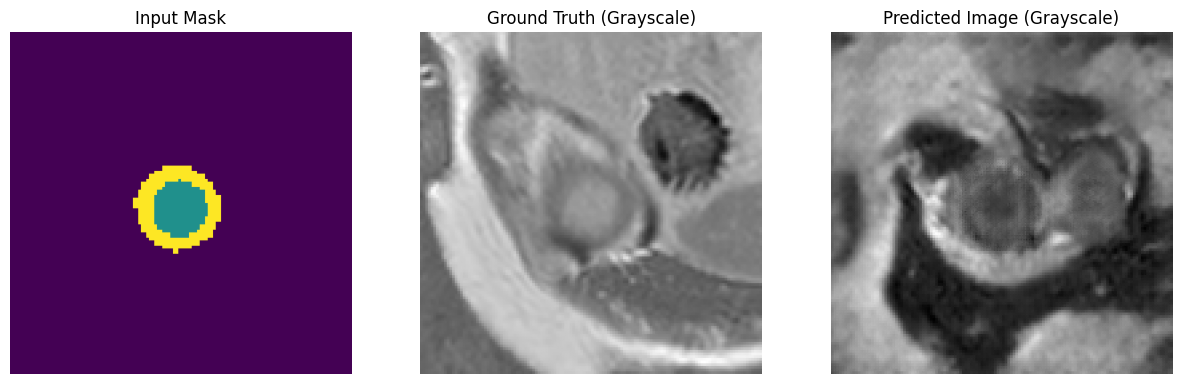

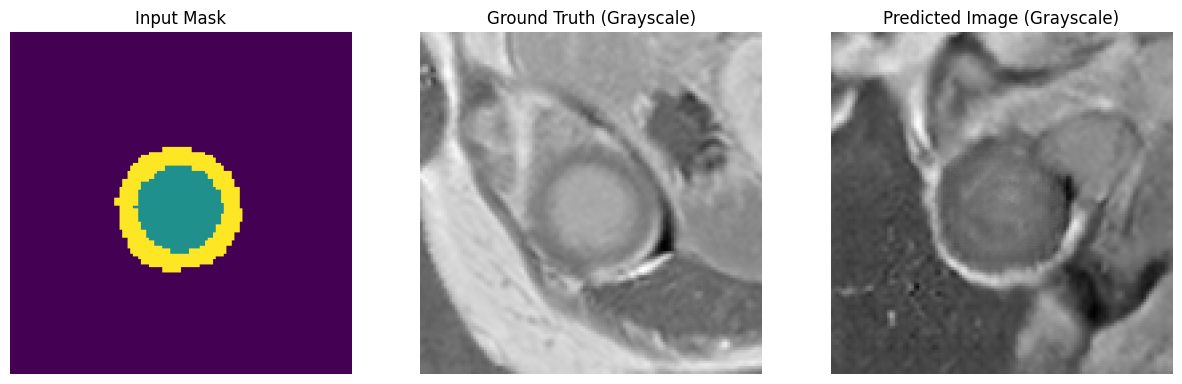

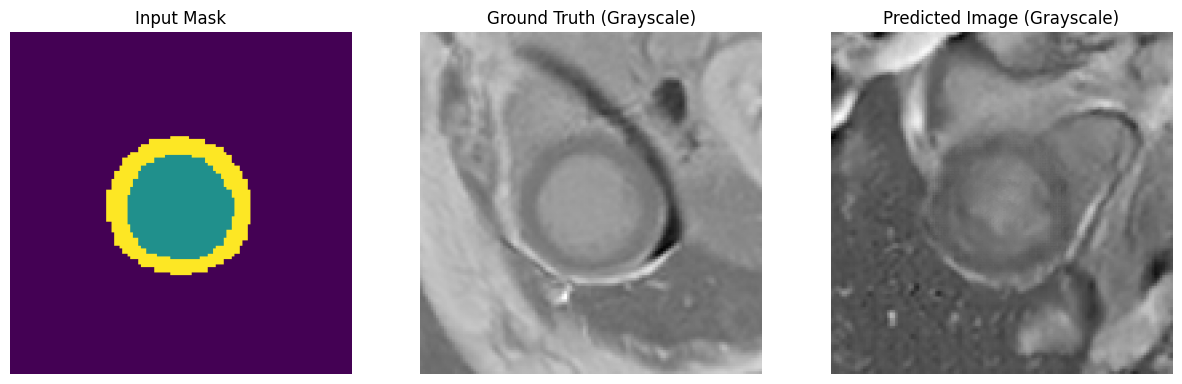

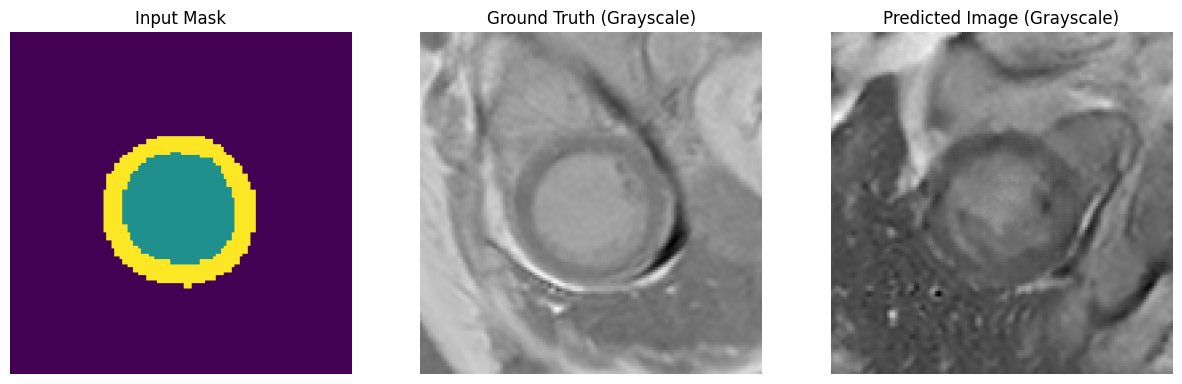

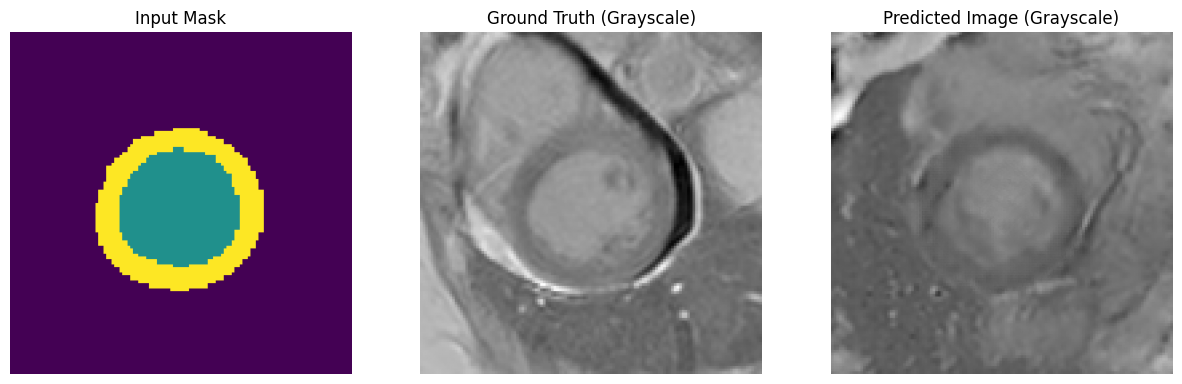

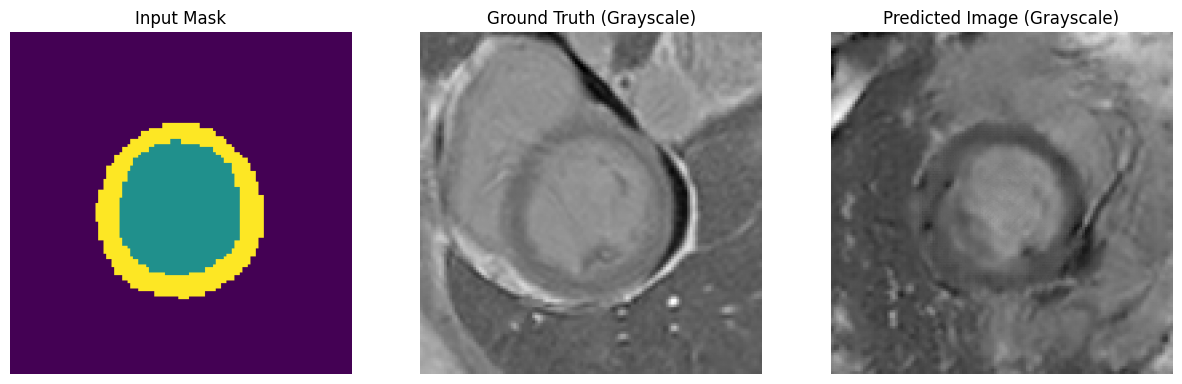

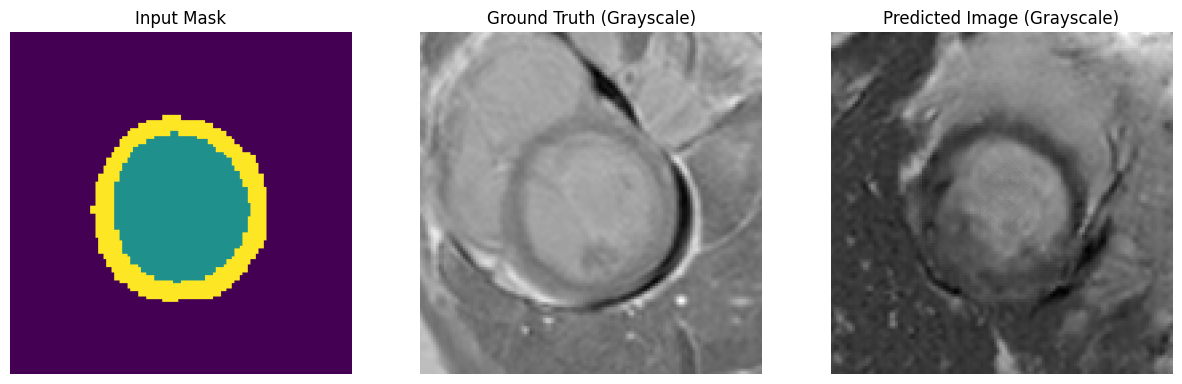

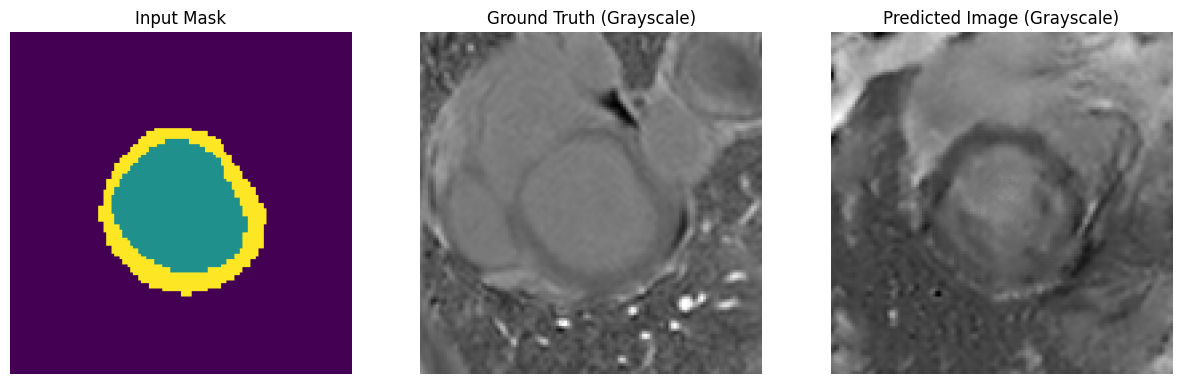

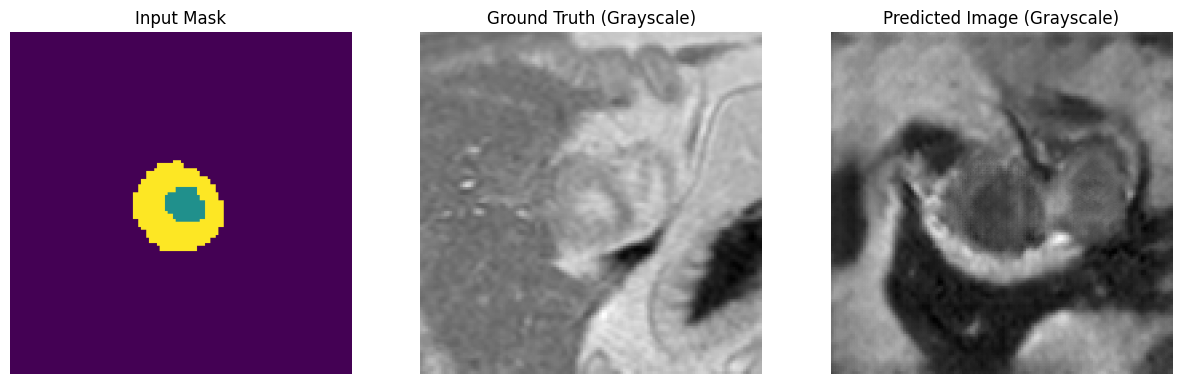

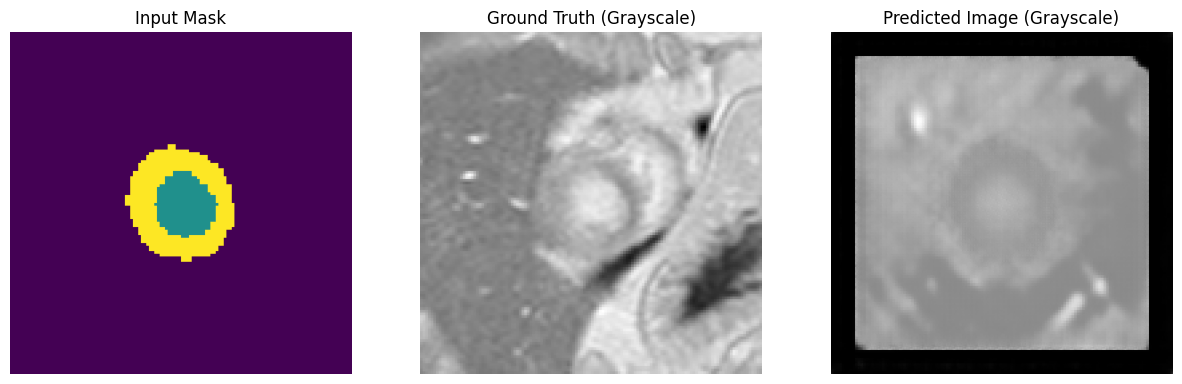

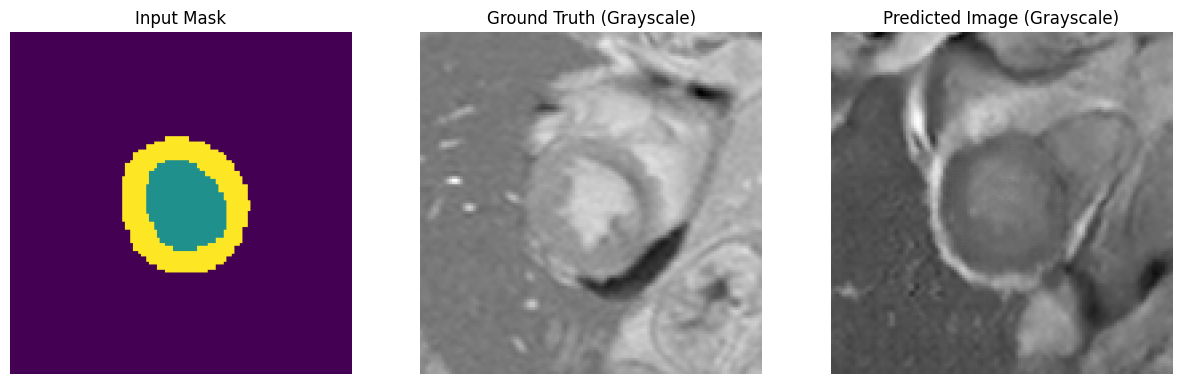

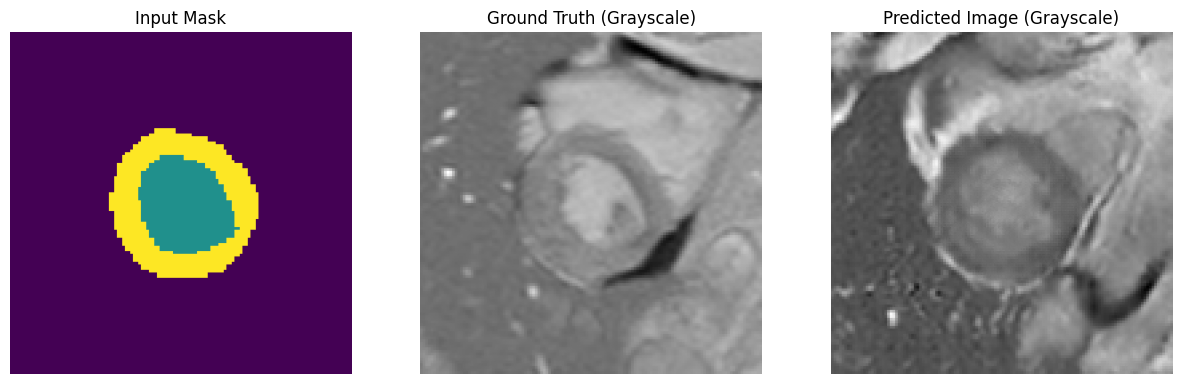

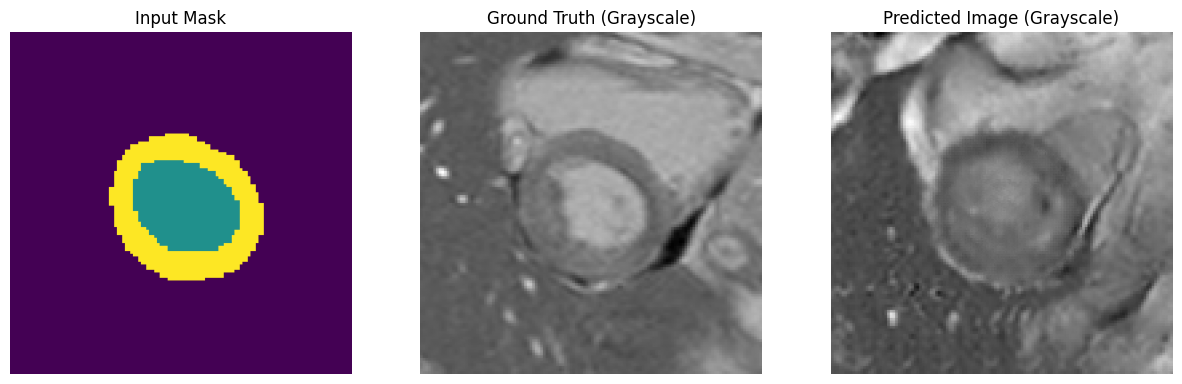

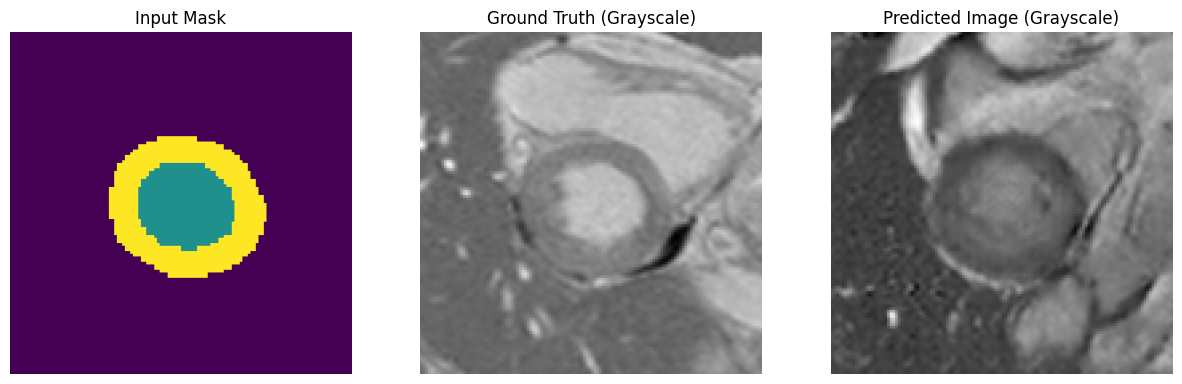

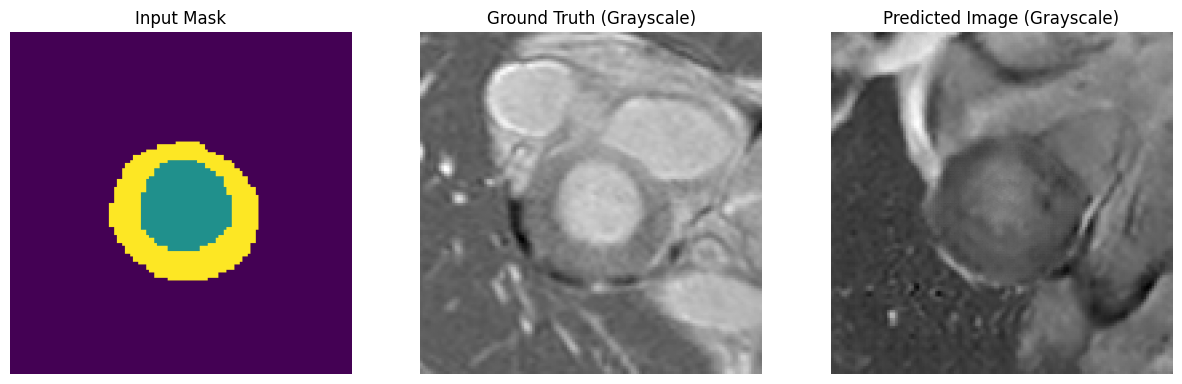

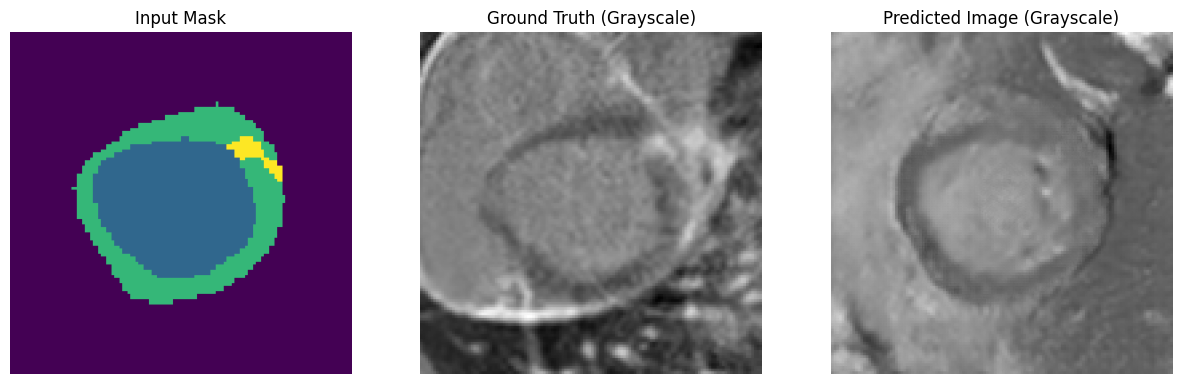

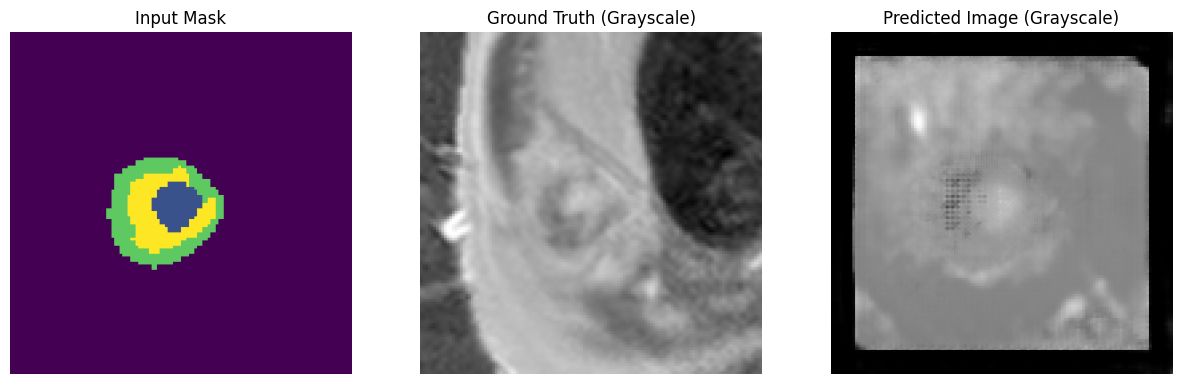

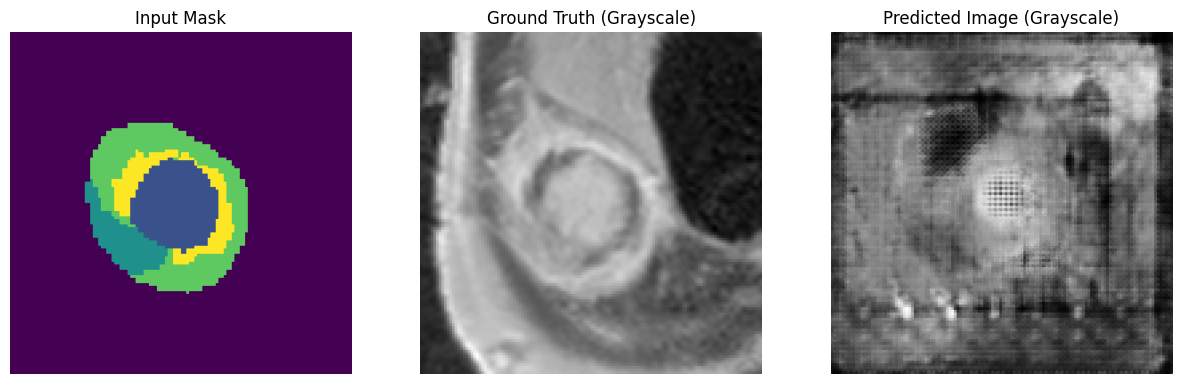

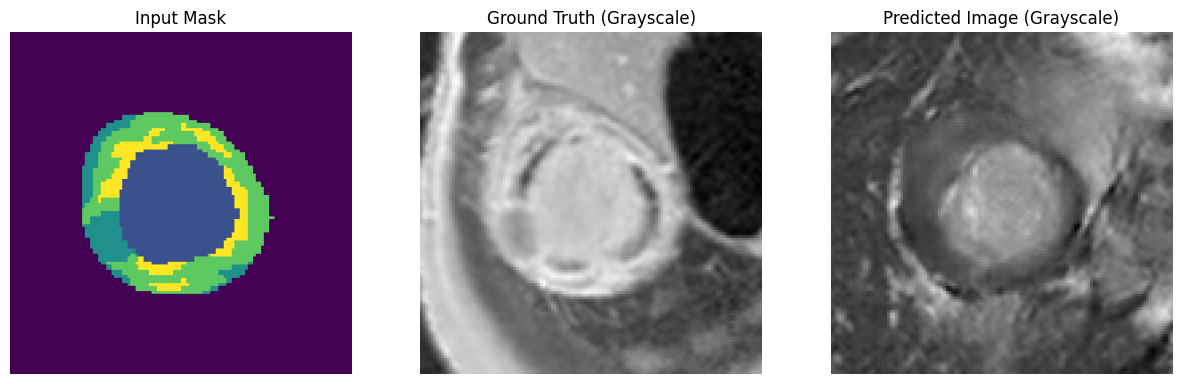

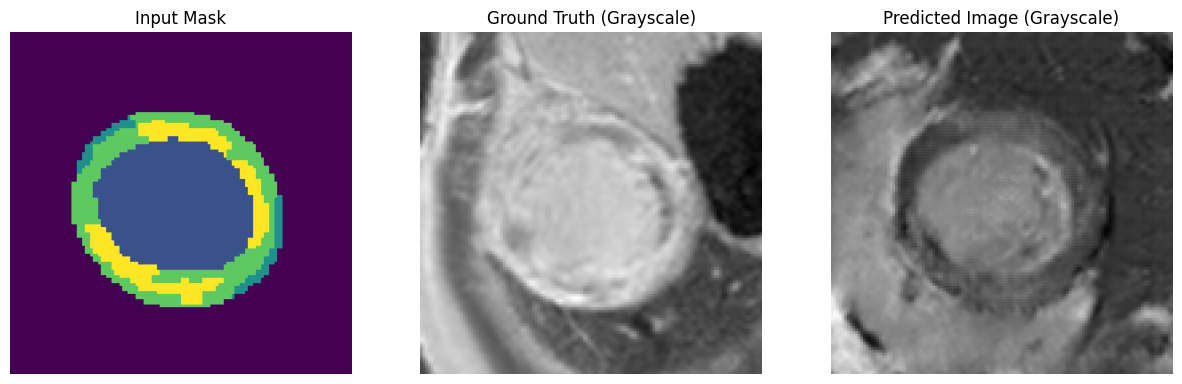

In [ ]:
# Run the trained model on a few examples from the test set
for inp, tar in test_dataset.take(20):
  generate_images(generator, inp, tar)

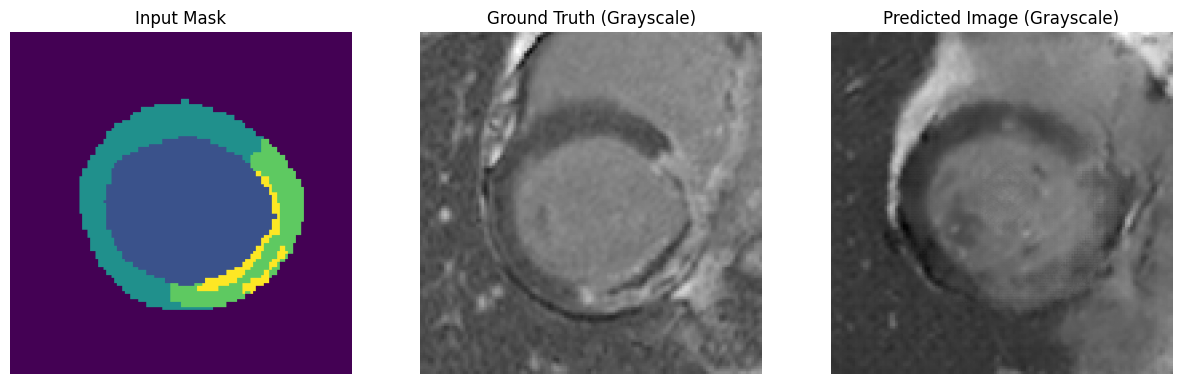

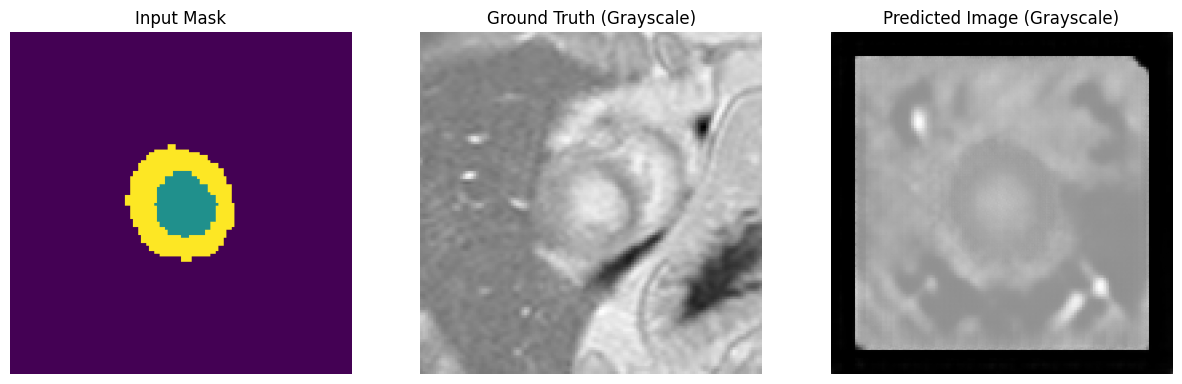

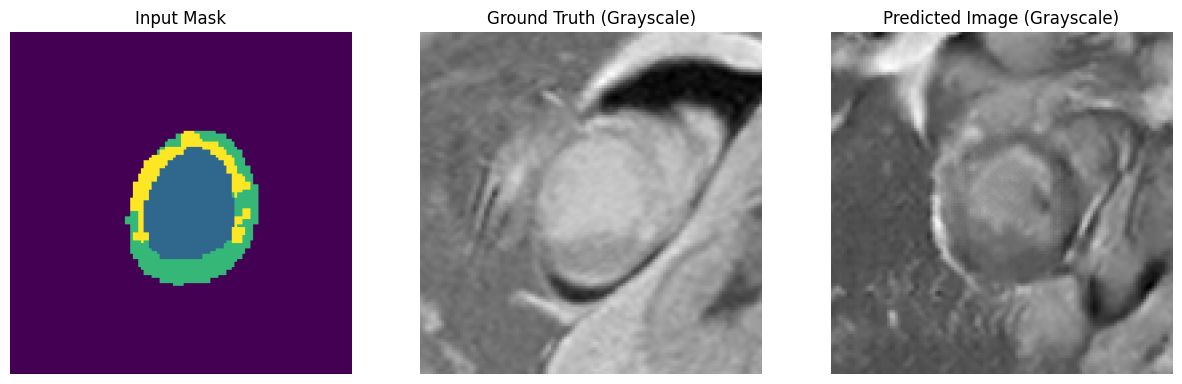

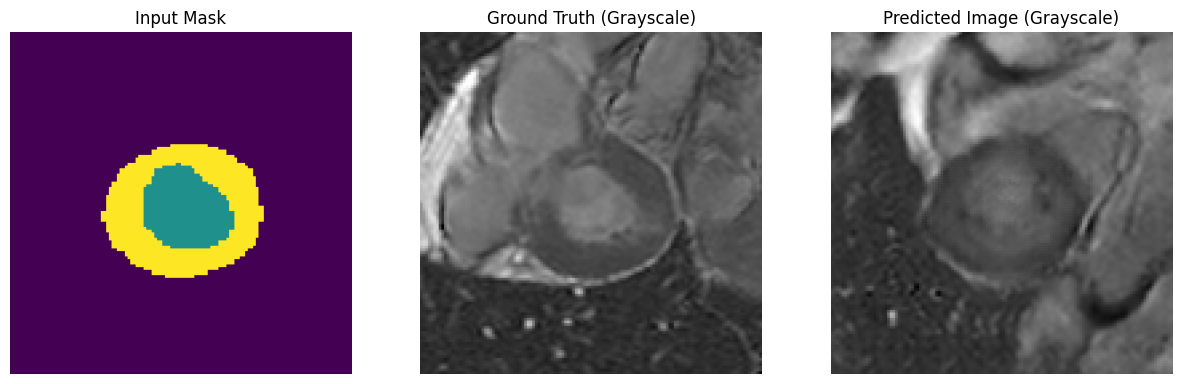

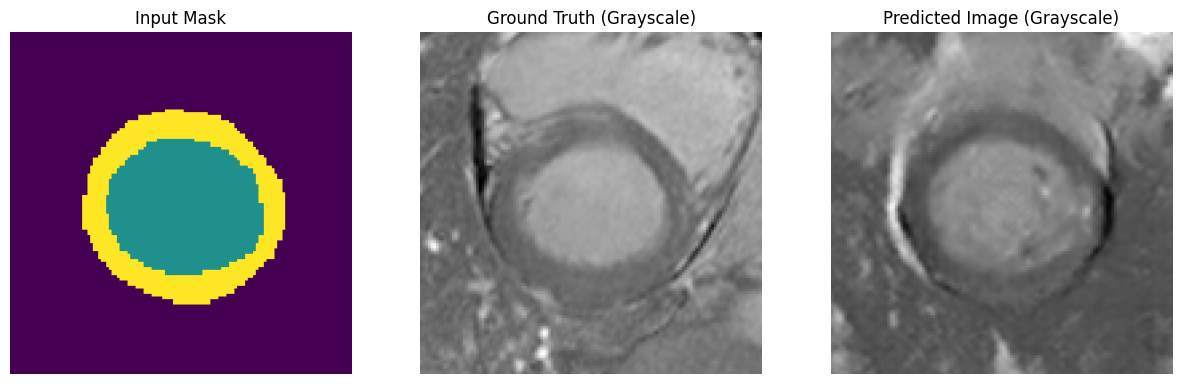

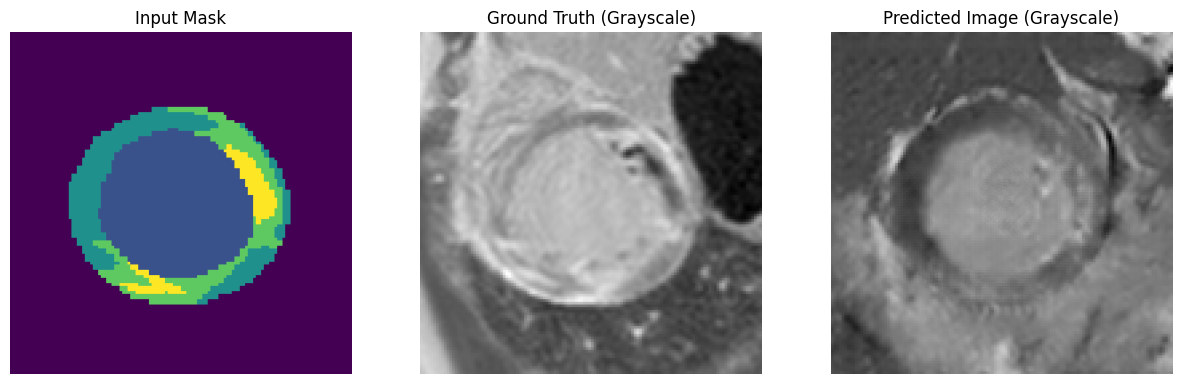

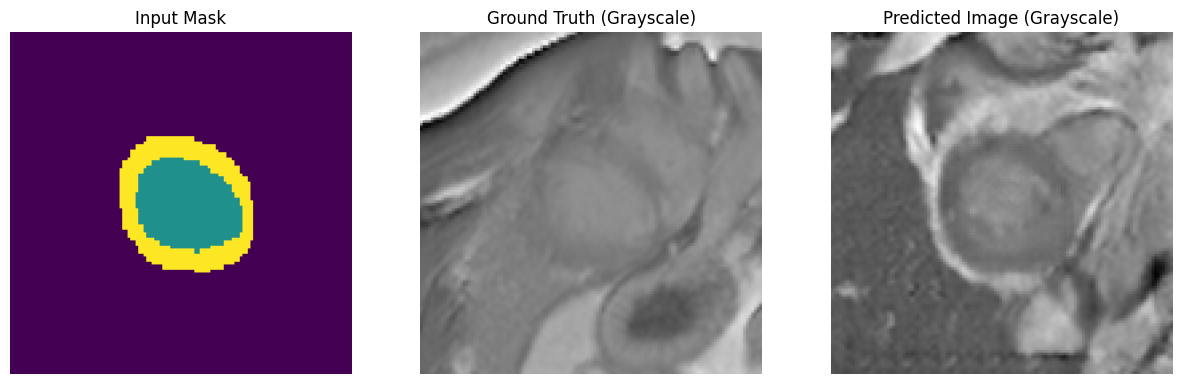

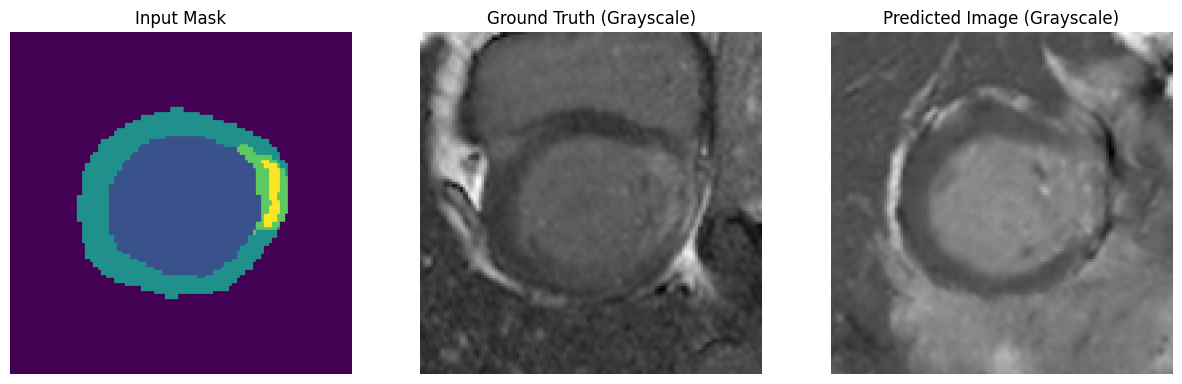

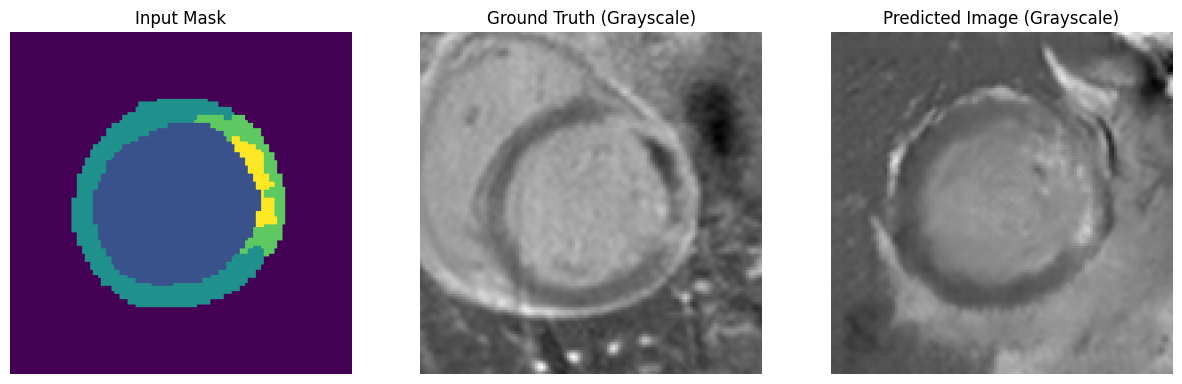

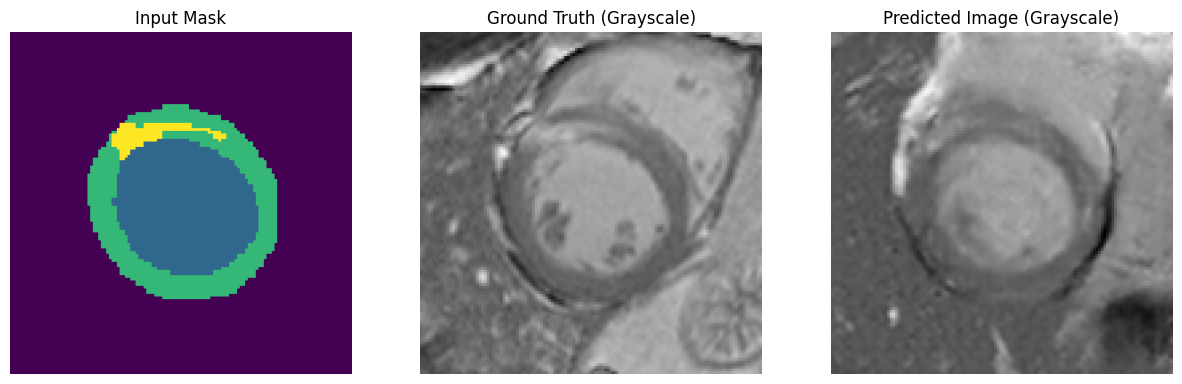

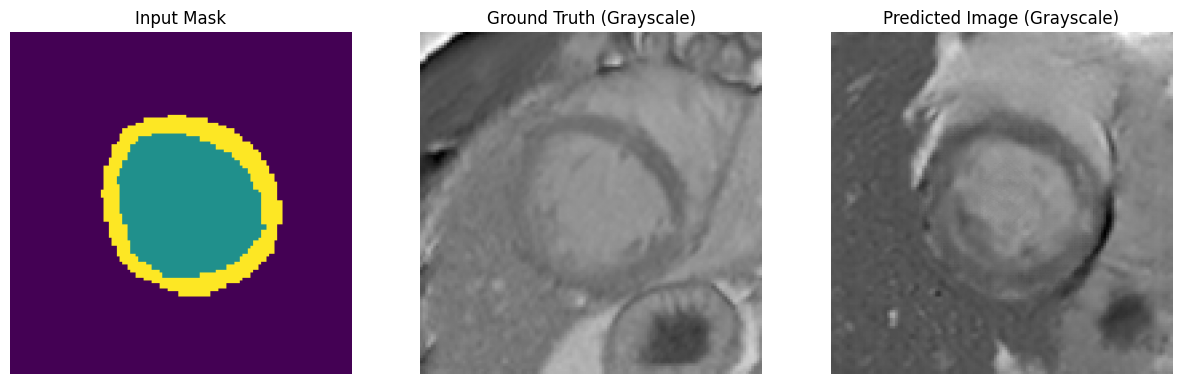

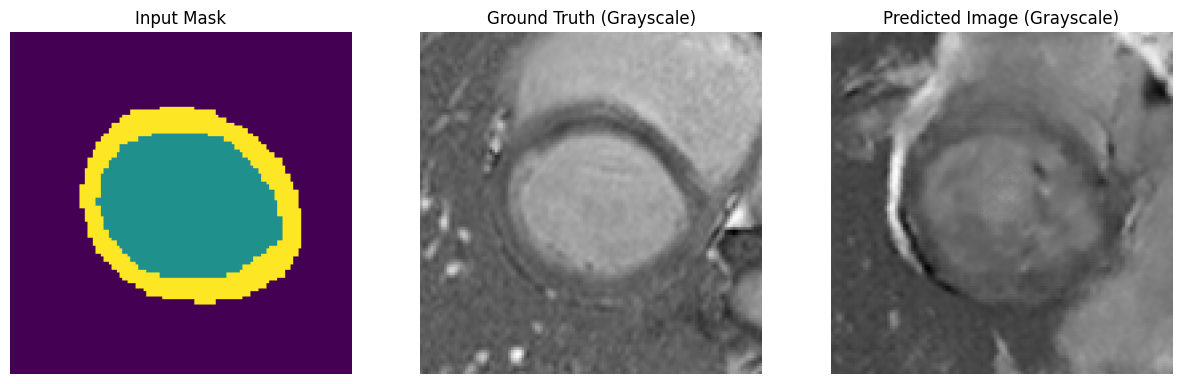

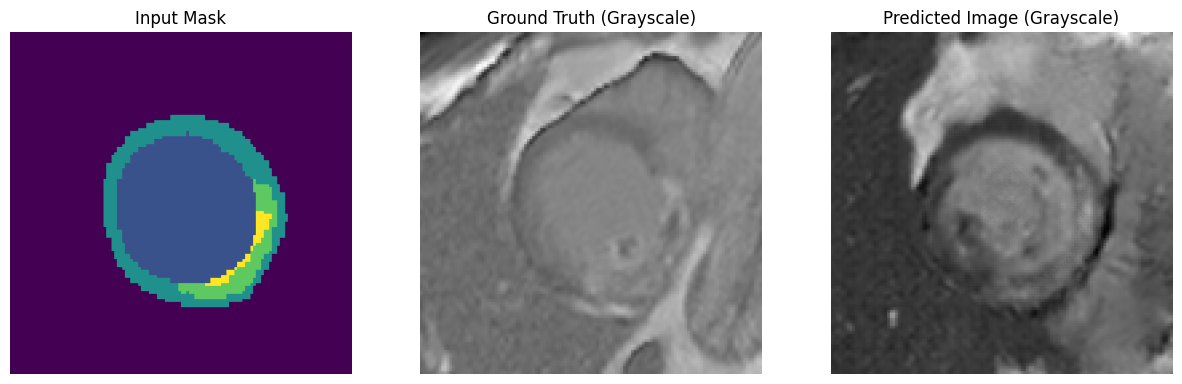

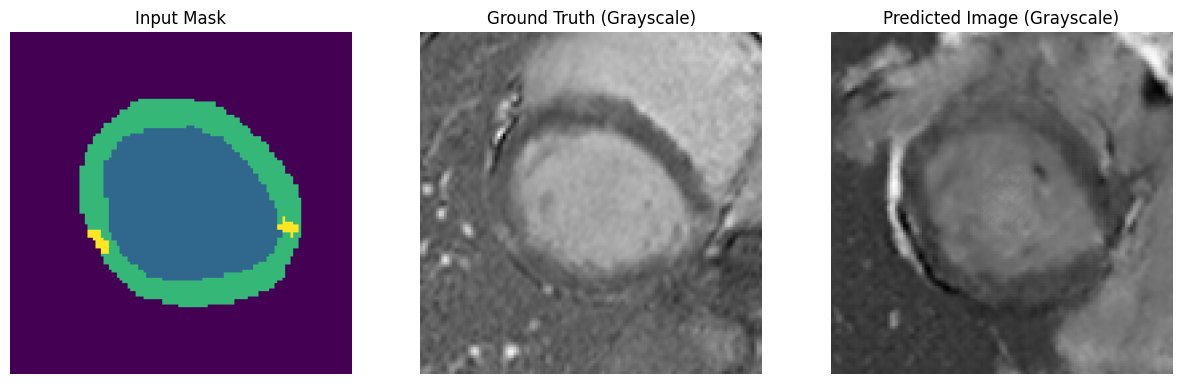

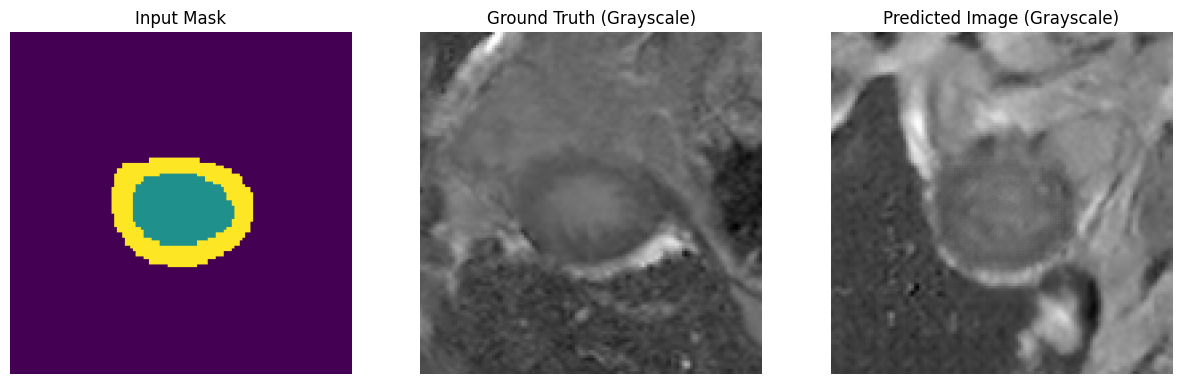

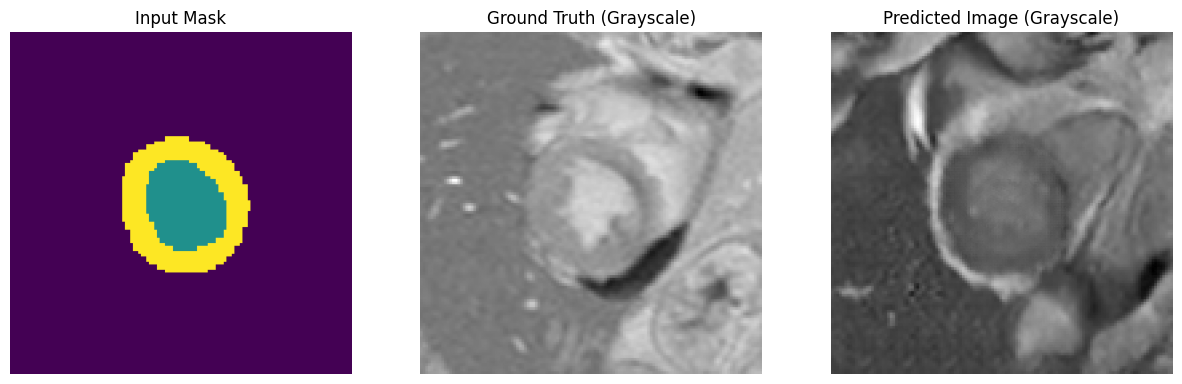

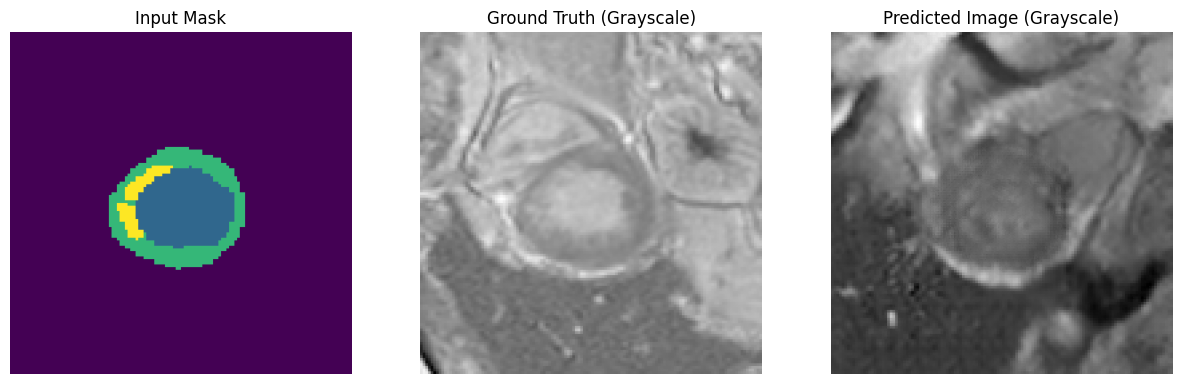

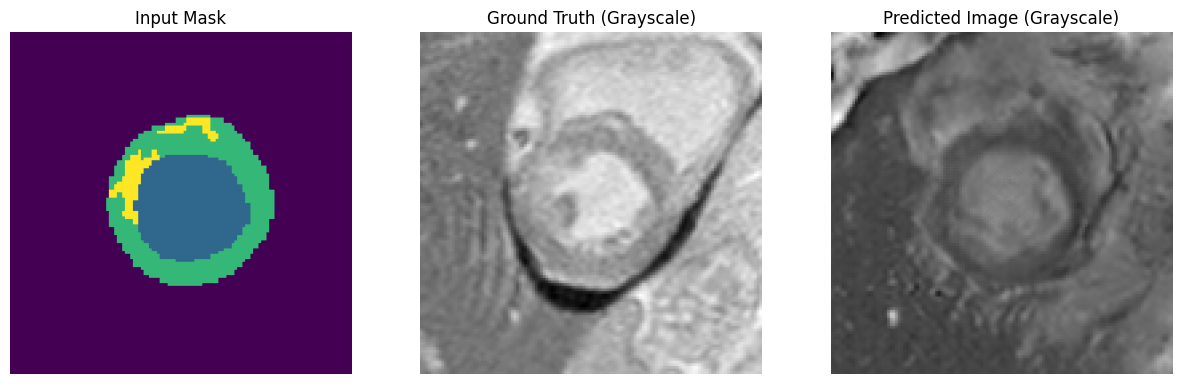

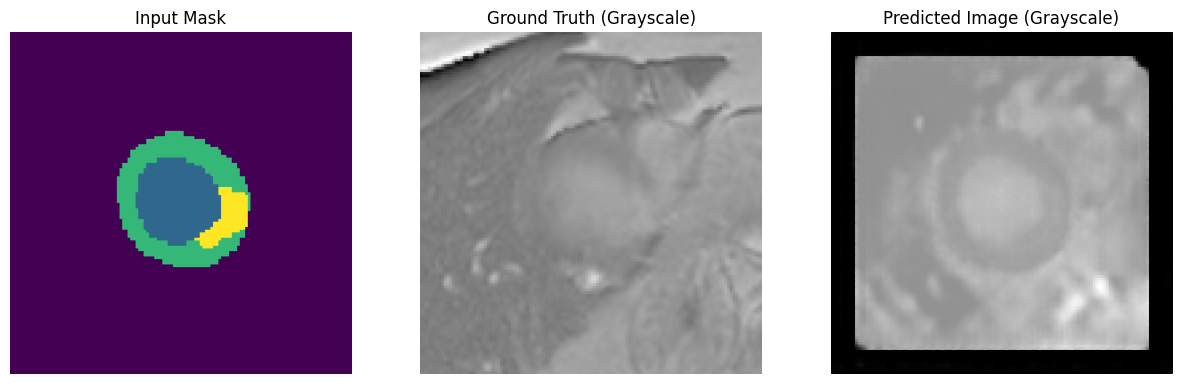

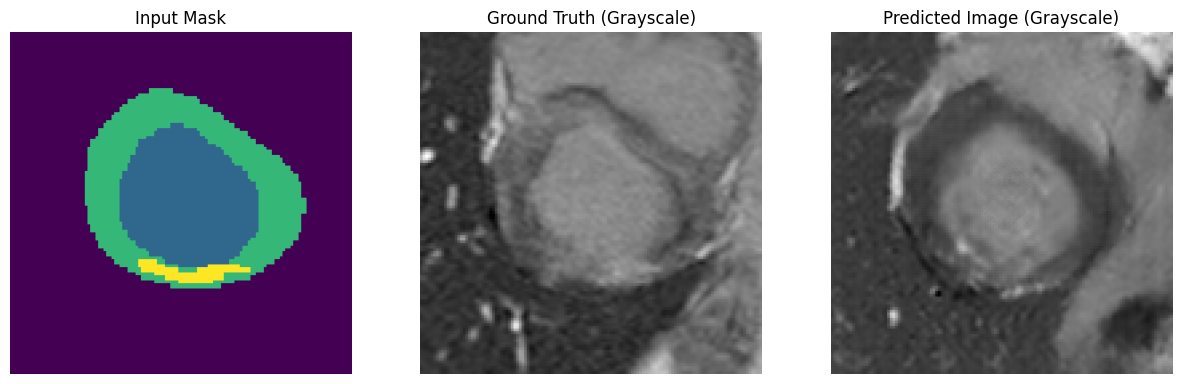

In [ ]:
# Shuffle the dataset before taking 20 random samples
for inp, tar in test_dataset.shuffle(100).take(20):  # Shuffle buffer should be large enough
  generate_images(generator, inp, tar)
